In [32]:
import pandas as pd

In [33]:
# Using Excel geography functionality, I put this together
cities = pd.read_excel("../../Data/TeamLatLng/City_Lat_Lng.xlsx", usecols=["CityString", "Latitude", "Longitude"])
cities

,CityString,Latitude,Longitude
0,Atlanta,33.748547,-84.391502
1,Baltimore,39.283333,-76.616667
2,Boston,42.358056,-71.063611
3,Cincinnati,39.103697,-84.513613
4,Cleveland,41.482222,-81.669722
5,Dallas,32.775833,-96.796667
6,Denver,39.739200,-104.990300
7,Detroit,42.332941,-83.047837
8,Houston,29.762778,-95.383056
9,Kansas City,39.099722,-94.578333


In [34]:
from math import cos, asin, sqrt
from typing import Tuple

# https://stackoverflow.com/questions/41336756/find-the-closest-latitude-and-longitude
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    hav = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(hav))

def closest(data, v):
    return min(data, key=lambda p: distance(v['Latitude'],v['Longitude'],p['Latitude'],p['Longitude']))

# Adapted from the above - return a dict for easy mapping in
def closest_city(data:pd.DataFrame) -> Tuple[dict, dict]:
    nearest_city = {}
    distance_to = {}
    for city in data["CityString"].unique():
        other_cities = [x for x in data["CityString"].unique() if x != city]
        closest = min(other_cities, key=lambda other: distance(data.loc[data["CityString"]==city, "Latitude"].values[0], data.loc[data["CityString"]==city, "Longitude"].values[0],
                                                           data.loc[data["CityString"]==other, "Latitude"].values[0], data.loc[data["CityString"]==other, "Longitude"].values[0]))
        nearest_city[city] = closest
        distance_to[city] = distance(data.loc[data["CityString"]==city, "Latitude"].values[0], data.loc[data["CityString"]==city, "Longitude"].values[0],
                                                           data.loc[data["CityString"]==closest, "Latitude"].values[0], data.loc[data["CityString"]==closest, "Longitude"].values[0])

    return nearest_city, distance_to

In [35]:
distance(cities.loc[cities["CityString"]=="Miami", "Latitude"].values[0], cities.loc[cities["CityString"]=="Miami", "Longitude"].values[0], cities.loc[cities["CityString"]=="Seattle", "Latitude"].values[0], cities.loc[cities["CityString"]=="Seattle", "Longitude"].values[0])

4394.608239448484

In [36]:
closest_market_map, distance_to_map = closest_city(cities)
closest_market_map

{'Atlanta': 'Cincinnati',
 'Baltimore': 'Washington DC',
 'Boston': 'Philadelphia',
 'Cincinnati': 'Cleveland',
 'Cleveland': 'Detroit',
 'Dallas': 'Houston',
 'Denver': 'Kansas City',
 'Detroit': 'Cleveland',
 'Houston': 'Dallas',
 'Kansas City': 'St. Louis',
 'Miami': 'Tampa Bay',
 'Milwaukee': 'Detroit',
 'Minneapolis-Saint Paul': 'Milwaukee',
 'Philadelphia': 'Baltimore',
 'Phoenix': 'San Diego',
 'Pittsburg': 'Cleveland',
 'San Diego': 'Phoenix',
 'Seattle': 'Denver',
 'St. Louis': 'Kansas City',
 'Tampa Bay': 'Miami',
 'Washington DC': 'Baltimore'}

In [42]:
# Load current data
current_data = pd.read_csv("../../Data/CSVData/cleaned_current_markets_data.csv")
current_data.head()

new_data = pd.read_csv("../../Data/CSVData/cleaned_new_markets_data.csv")
new_data.head()

,Market,Year,Dome,NumTeams,Households,Households Margin of Error,"Households Less Than $10,000","Households Less Than $10,000 Margin of Error","Households $10,000 to $14,999","Households $10,000 to $14,999 Margin of Error",...,"Nonfamily Households $100,000 to $149,999 Margin of Error","Nonfamily Households $150,000 to $199,999","Nonfamily Households $150,000 to $199,999 Margin of Error","Nonfamily Households $200,000 or More","Nonfamily Households $200,000 or More Margin of Error",Nonfamily Households Median Income (Dollars),Nonfamily Households Median Income (Dollars) Margin of Error,Nonfamily Households Mean Income (Dollars),Nonfamily Households Mean Income (Dollars) Margin of Error,Nonfamily Households Nonfamily Income in the Past 12 Months
0,Albuquerque,2021.0,0,1,373092.0,19590.0,443.6,486.6,282.2,433.4,...,988.7,110.4,985.7,104.3,944.5,1795475.0,549544.0,2449235.0,557607.0,1776.8
1,Albuquerque,2021.0,1,1,373092.0,19590.0,443.6,486.6,282.2,433.4,...,988.7,110.4,985.7,104.3,944.5,1795475.0,549544.0,2449235.0,557607.0,1776.8
2,Albuquerque,2020.0,0,1,370359.0,19814.0,458.6,409.7,332.2,423.9,...,895.4,94.1,906.5,154.3,822.1,1582101.0,417661.0,2357755.0,539532.0,1768.2
3,Albuquerque,2020.0,1,1,370359.0,19814.0,458.6,409.7,332.2,423.9,...,895.4,94.1,906.5,154.3,822.1,1582101.0,417661.0,2357755.0,539532.0,1768.2
4,Albuquerque,2019.0,0,1,363881.0,12379.0,505.7,384.2,337.2,343.1,...,797.5,94.5,803.9,152.7,754.6,1553939.0,345765.0,2293155.0,486458.0,1753.6


In [43]:
current_data["ClosestMarket"] = current_data["Market"]
current_data.loc[:, "ClosestMarket"] = current_data.loc[:, "ClosestMarket"].map(closest_market_map)

current_data["ClosestMarketDistance"] = current_data["Market"]
current_data.loc[:, "ClosestMarketDistance"] = current_data.loc[:, "ClosestMarketDistance"].map(distance_to_map)

new_data["ClosestMarket"] = new_data["Market"]
new_data.loc[:, "ClosestMarket"] = new_data.loc[:, "ClosestMarket"].map(closest_market_map)

new_data["ClosestMarketDistance"] = new_data["Market"]
new_data.loc[:, "ClosestMarketDistance"] = new_data.loc[:, "ClosestMarketDistance"].map(distance_to_map)

new_data.head()

,Market,Year,Dome,NumTeams,Households,Households Margin of Error,"Households Less Than $10,000","Households Less Than $10,000 Margin of Error","Households $10,000 to $14,999","Households $10,000 to $14,999 Margin of Error",...,"Nonfamily Households $150,000 to $199,999 Margin of Error","Nonfamily Households $200,000 or More","Nonfamily Households $200,000 or More Margin of Error",Nonfamily Households Median Income (Dollars),Nonfamily Households Median Income (Dollars) Margin of Error,Nonfamily Households Mean Income (Dollars),Nonfamily Households Mean Income (Dollars) Margin of Error,Nonfamily Households Nonfamily Income in the Past 12 Months,ClosestMarket,ClosestMarketDistance
0,Albuquerque,2021.0,0,1,373092.0,19590.0,443.6,486.6,282.2,433.4,...,985.7,104.3,944.5,1795475.0,549544.0,2449235.0,557607.0,1776.8,NaN,NaN
1,Albuquerque,2021.0,1,1,373092.0,19590.0,443.6,486.6,282.2,433.4,...,985.7,104.3,944.5,1795475.0,549544.0,2449235.0,557607.0,1776.8,NaN,NaN
2,Albuquerque,2020.0,0,1,370359.0,19814.0,458.6,409.7,332.2,423.9,...,906.5,154.3,822.1,1582101.0,417661.0,2357755.0,539532.0,1768.2,NaN,NaN
3,Albuquerque,2020.0,1,1,370359.0,19814.0,458.6,409.7,332.2,423.9,...,906.5,154.3,822.1,1582101.0,417661.0,2357755.0,539532.0,1768.2,NaN,NaN
4,Albuquerque,2019.0,0,1,363881.0,12379.0,505.7,384.2,337.2,343.1,...,803.9,152.7,754.6,1553939.0,345765.0,2293155.0,486458.0,1753.6,NaN,NaN


In [44]:
current_data.to_csv("../../Data/CSVData/enriched_clean_current_markets_data.csv", index=False)
new_data.to_csv("../../Data/CSVData/enriched_clean_new_markets_data.csv", index=False)

In [40]:
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='Valuation', ylabel='ClosestMarketDistance'>

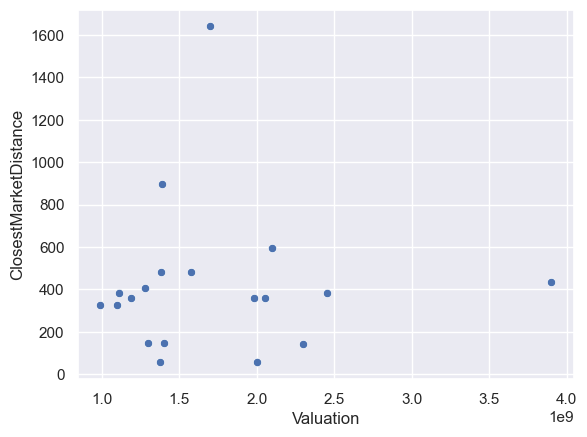

In [41]:
sns.scatterplot(data=current_data.loc[current_data["Year"]==2021.0], x="Valuation", y="ClosestMarketDistance")